In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils.plotting import plot_points, plot_decision_boundary

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Фиксация случайного seed для воспроизводимости результатов
np.random.seed(0)

# Загрузка и подготовка данных о спаме

In [2]:
# Создание массива данных: [Лотерея, Продажа, Спам (0/1)]
emails = np.array([
    [7,8,1], [3,2,0], [8,4,1], [2,6,0],
    [6,5,1], [9,6,1], [8,5,0], [7,1,0],
    [1,9,1], [4,7,0], [1,3,0], [3,10,1],
    [2,2,1], [9,3,0], [5,3,0], [10,1,0],
    [5,9,1], [10,8,1]
])

# Создание DataFrame с названиями столбцов
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset  # Вывод таблицы данных

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


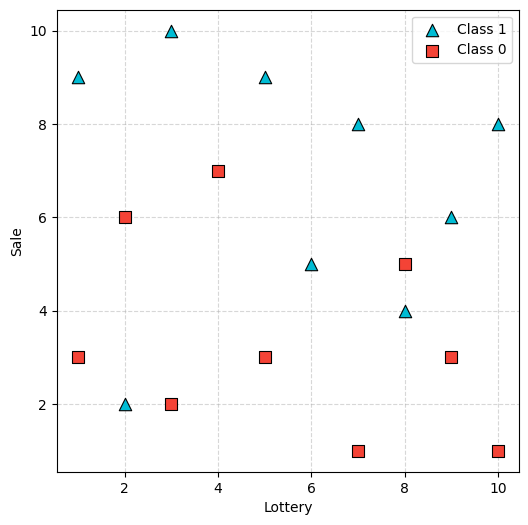

In [3]:
# Разделение на признаки и целевую переменную
features = spam_dataset[['Lottery', 'Sale']]  # Признаки
labels = spam_dataset['Spam']  # Метки (целевая переменная)

# CLass 1 - Spam
# Class 0 - Ham

# Визуализация точек данных
plot_points(features, labels)
plt.show()

# Обучение одного дерева решений

In [4]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)  # Создание классификатора
decision_tree_classifier.fit(features, labels)  # Обучение модели

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
print("Accuracy:", decision_tree_classifier.score(features, labels))  # Оценка точности

Accuracy: 1.0


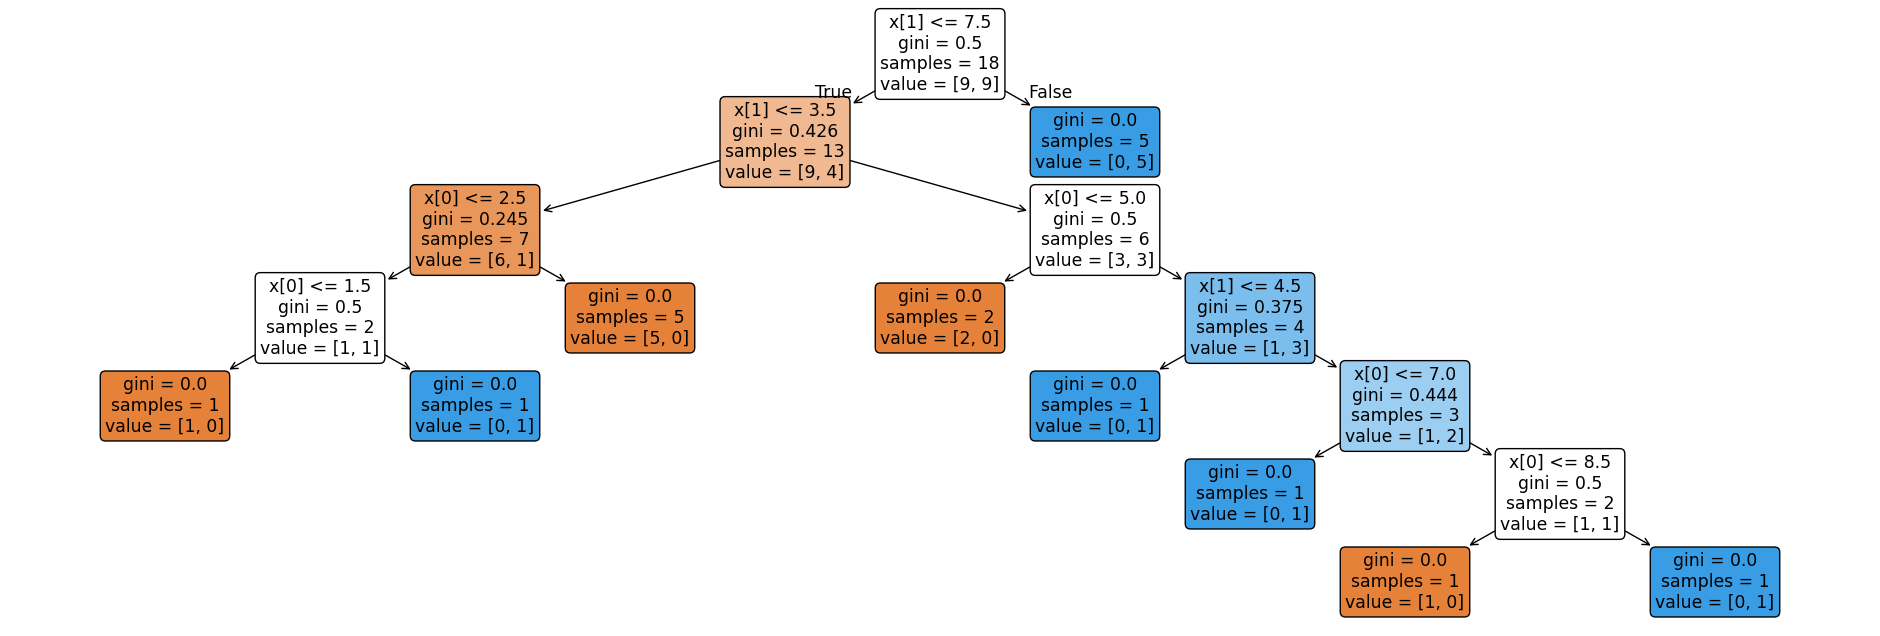

In [6]:
# Визуализация дерева решений
plt.figure(figsize=(24, 8))  # Увеличиваем размер изображения
tree.plot_tree(decision_tree_classifier, rounded=True, filled=True)
plt.show()

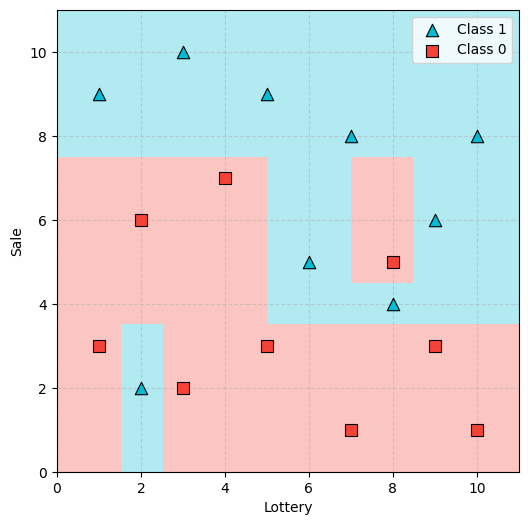

In [7]:
# Визуализация границы решения классификатора
plot_decision_boundary(decision_tree_classifier, features, labels)
plt.show()

# Ручное создание ансамбля (аналог Random Forest)

In [8]:
# Определяем диапазоны индексов для каждого батча
batches = [
    range(0, 6),    # Первый батч: индексы 0-5
    range(6, 12),   # Второй батч: индексы 6-11
    range(12, 18)   # Третий батч: индексы 12-17
]

# Заголовки для каждого подграфика
titles = ['First Batch (0-5)', 
          'Second Batch (6-11)', 
          'Third Batch (12-17)']

features_split = []
labels_split = []

# Цикл по всем батчам
for i, (batch_range) in enumerate(batches):
    # Выбираем данные для текущего батча
    batch_data = spam_dataset.loc[batch_range]
    features_split.append(batch_data[['Lottery', 'Sale']])
    labels_split.append(batch_data['Spam'])

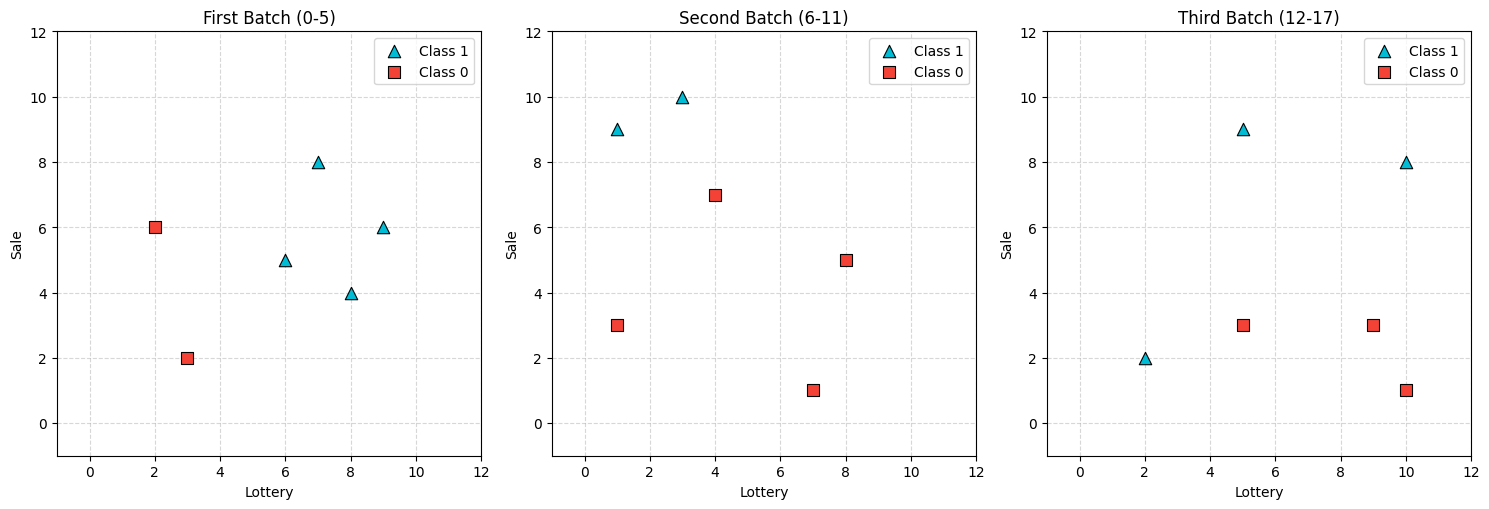

In [9]:
x_min, x_max = features['Lottery'].min() - 2, features['Lottery'].max() + 2
y_min, y_max = features['Sale'].min() - 2, features['Sale'].max() + 2

# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, (batch_range, title, features_one, labels_one) in enumerate(zip(batches, titles, features_split, labels_split)):

    # Отображаем точки на текущем подграфике
    plot_points(features_one, labels_one, ax=axes[i])  # Передаем конкретную ось для отрисовки
    
    axes[i].set_title(title)  # Устанавливаем заголовок
    axes[i].set_xlabel('Lottery')  # Подпись оси X
    axes[i].set_ylabel('Sale')     # Подпись оси Y
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    
plt.tight_layout()  # Автоматическая настройка отступов между графиками
plt.show()  # Показываем все графики

In [10]:
dt_models = []
scores = []

# Цикл по всем батчам
for i, (features_one, labels_one) in enumerate(zip(features_split, labels_split)):

    dt = DecisionTreeClassifier(random_state=0, max_depth=1)
    dt.fit(features_one, labels_one)
    
    dt_models.append(dt)
    scores.append(dt.score(features_one, labels_one))

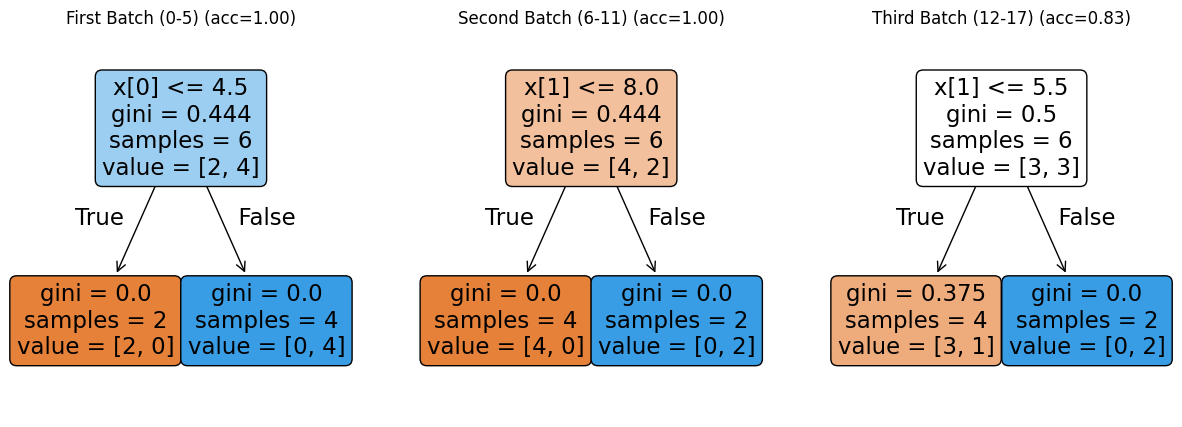

In [11]:
# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, (title, dt_model, score) in enumerate(zip(titles, dt_models, scores)):
    # Визуализация дерева решений
    tree.plot_tree(dt_model, rounded=True, filled=True, ax=axes[i])
    
    axes[i].set_title(f'{title} (acc={score:.2f})')  # Устанавливаем заголовок
    
plt.show()

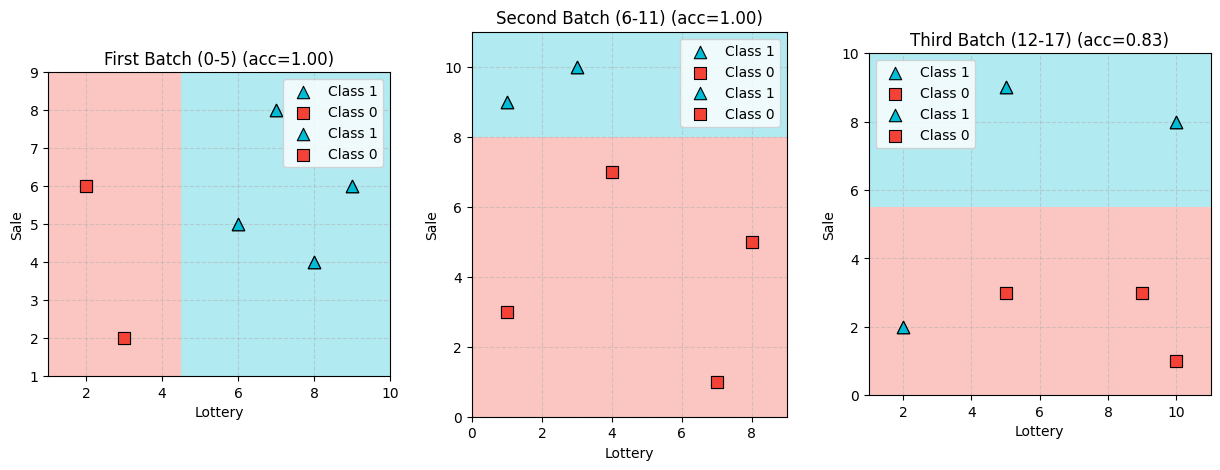

In [15]:
# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 строка, 3 столбца, размер 15x5 дюймов

for i, (title, features_one, labels_one, dt_model, score) in enumerate(zip(titles, features_split, labels_split, dt_models, scores)):
    
    # Визуализация границы решения классификатора
    plot_decision_boundary(dt_model, features_one, labels_one, ax=axes[i])

    # Отображаем точки на текущем подграфике
    plot_points(features_one, labels_one, ax=axes[i])  # Передаем конкретную ось для отрисовки
    
    axes[i].set_title(f'{title} (acc={score:.2f})')  # Устанавливаем заголовок
    axes[i].set_xlabel('Lottery')  # Подпись оси X
    axes[i].set_ylabel('Sale')     # Подпись оси Y
    
plt.show()